In [71]:
from sklearn.metrics import confusion_matrix
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns

In [72]:
crops = ['apple',
 'banana',
 'blackgram',
 'chickpea',
 'coconut',
 'coffee',
 'cotton',
 'grapes',
 'jute',
 'kidneybeans',
 'lentil',
 'maize',
 'mango',
 'mothbeans',
 'mungbean',
 'muskmelon',
 'orange',
 'papaya',
 'pigeonpeas',
 'pomegranate',
 'rice',
 'watermelon']

In [73]:
data = pd.read_csv("crop-prediction.csv")
data.head

<bound method NDFrame.head of         N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]>

In [74]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size = 0.2)

In [75]:
# input_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_data.drop('label', axis = 'columns'))
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_data, label='label')


In [76]:
model = tfdf.keras.RandomForestModel()

model.fit(x = train_ds)

Use /tmp/tmpka_rzmk9 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.158619. Found 1760 examples.
Training model...


2023-04-11 10:38:49.168298: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_7' with dtype int64 and shape [1760]
	 [[{{node Placeholder/_7}}]]


Model trained in 0:00:00.235716
Compiling model...
Model compiled.


[INFO 23-04-11 10:38:49.5193 IST kernel.cc:1242] Loading model from path /tmp/tmpka_rzmk9/model/ with prefix 33e2e0a023504527
[INFO 23-04-11 10:38:49.5539 IST decision_forest.cc:660] Model loaded with 300 root(s), 24836 node(s), and 7 input feature(s).
[INFO 23-04-11 10:38:49.5539 IST abstract_model.cc:1311] Engine "RandomForestGeneric" built
[INFO 23-04-11 10:38:49.5539 IST kernel.cc:1074] Use fast generic engine
2023-04-11 10:38:49.577126: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_5' with dtype double and shape [1760]
	 [[{{node Placeholder/_5}}]]


In [77]:
#Only a single epoch is required for a Decision Forest, extras lead to slower training
model.compile(metrics = ['accuracy'])


In [78]:
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_data, label='label')

model.evaluate(test_ds)

1/1 [==============================] - 0s 115ms/step - loss: 0.0000e+00 - accuracy: 0.9932


2023-04-11 10:38:49.802522: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_5' with dtype double and shape [440]
	 [[{{node Placeholder/_5}}]]


[0.0, 0.9931818246841431]

In [79]:
model.make_inspector().evaluation()

Evaluation(num_examples=1760, accuracy=0.990909090909091, loss=0.04427047546063973, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

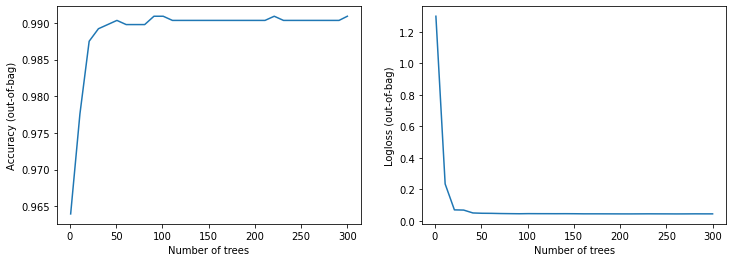

In [80]:
import matplotlib.pyplot as plt

logs = model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

In [81]:
predictions = model.predict(test_ds)
type(predictions)

1/1 [==============================] - 0s 49ms/step


numpy.ndarray

In [82]:
# test_data = tfdf.keras.pd_dataframe_to_tf_dataset(test_data)


In [83]:
from tensorflow import concat, argmax
true_anwer = concat([y for x,y in test_ds], axis=0)
true_anwer

<tf.Tensor: shape=(440,), dtype=int64, numpy=
array([ 7, 11, 10,  0,  8, 11, 13, 12, 16, 15, 13, 12,  9,  6, 20,  6,  3,
       10, 20, 19,  5,  7,  9, 15,  8,  6,  7, 14,  9, 17, 21, 14,  9, 18,
       10,  1,  6,  4,  5,  6,  8, 20, 10,  8, 10, 18,  8, 11, 18, 10,  5,
       19, 16, 14, 18,  9, 14, 12, 10,  1, 16, 21, 14, 11,  1, 14,  0,  5,
        2, 10, 19,  1, 15,  9, 18, 16, 18, 10,  3, 10, 17, 10,  7, 11, 10,
        6, 20,  9,  7, 20,  3,  9,  2,  4,  1,  8,  9, 12,  4, 18,  6,  2,
        7, 15,  8,  6,  3, 11, 17,  3,  2, 21, 20,  9, 12,  0, 11,  6, 14,
       17,  7, 14,  0,  7, 10, 16, 17, 18, 14,  0, 20,  2, 10,  0,  0,  1,
       21, 11,  4, 20, 14,  6,  3,  6, 19, 19, 17, 21, 10, 18, 13,  4, 20,
       10,  7, 16,  9, 14, 13,  2,  7,  3,  2, 13,  1, 10, 16, 12,  4, 21,
        2, 10, 20, 20, 15, 10,  4,  3, 20,  4, 15, 21, 21,  2, 12,  6, 15,
        7, 16,  2, 19, 12, 15,  0,  6, 16, 13, 10, 13, 12,  2, 17, 21, 17,
       13, 15, 14, 16, 18, 13, 18, 13, 18,  3, 13, 19,

In [84]:
predicted_answers = argmax(predictions, axis=1)
predicted_answers

<tf.Tensor: shape=(440,), dtype=int64, numpy=
array([ 7, 11, 10,  0,  8, 11, 13, 12, 16, 15, 13, 12,  9,  6, 20,  6,  3,
       10, 20, 19,  5,  7,  9, 15,  8,  6,  7, 14,  9, 17, 21, 14,  9, 18,
       10,  1,  6,  4,  5,  6,  8, 20, 10,  8, 10, 18,  8, 11, 18, 10,  5,
       19, 16, 14, 18,  9, 14, 12, 10,  1, 16, 21, 14, 11,  1, 14,  0,  5,
        2, 10, 19,  1, 15,  9, 18, 16, 18, 10,  3, 10, 17, 10,  7, 11, 10,
        6, 20,  9,  7, 20,  3,  9,  2,  4,  1,  8,  9, 12,  4, 18,  6,  2,
        7, 15,  8,  6,  3, 11, 17,  3,  2, 21, 20,  9, 12,  0, 11,  6, 14,
       17,  7, 14,  0,  7, 10, 16, 17, 18, 14,  0, 20,  2, 10,  0,  0,  1,
       21, 11,  4, 20, 14,  6,  3,  6, 19, 19, 17, 21, 10, 18, 13,  4, 20,
       10,  7, 16,  9, 14, 13,  2,  7,  3,  2, 13,  1, 10, 16, 12,  4, 21,
        2, 10,  8, 20, 15, 10,  4,  3, 20,  4, 15, 21, 21,  2, 12,  6, 15,
        7, 16,  2, 19, 12, 15,  0,  6, 16, 13, 10, 13, 12,  2, 17, 21, 17,
       13, 15, 14, 16, 18, 13, 18, 13, 18,  3, 13, 19,

<Axes: >

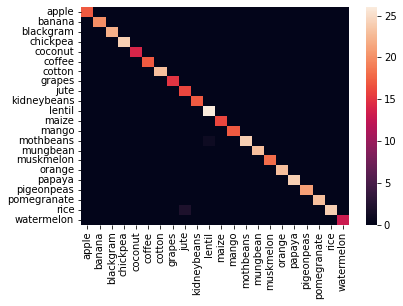

In [85]:

sns.heatmap(confusion_matrix(true_anwer, predicted_answers), xticklabels = crops, yticklabels = crops,)

In [86]:
from sklearn.metrics import classification_report
print(classification_report(true_anwer, predicted_answers))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        15
           8       0.89      1.00      0.94        16
           9       1.00      1.00      1.00        17
          10       0.96      1.00      0.98        26
          11       1.00      1.00      1.00        16
          12       1.00      1.00      1.00        17
          13       1.00      0.96      0.98        25
          14       1.00      1.00      1.00        23
          15       1.00      1.00      1.00        18
          16       1.00      1.00      1.00        23
          17       1.00    

### References

1. [tensorflow.org](https://www.tensorflow.org/decision_forests)
1. stackoverflow.com
1. scikit-learn.org

In [87]:
tuner = tfdf.tuner.RandomSearch(num_trials=75)
tuner.choice("min_examples", [2, 5, 7, 10])
tuner.choice("categorical_algorithm", ["CART", "RANDOM"])

# Some hyper-parameters are only valid for specific values of other
# hyper-parameters. For example, the "max_depth" parameter is mostly useful when
# "growing_strategy=LOCAL" while "max_num_nodes" is better suited when
# "growing_strategy=BEST_FIRST_GLOBAL".

local_search_space = tuner.choice("growing_strategy", ["LOCAL"])
local_search_space.choice("max_depth", [3, 4, 5, 6, 8])

# merge=True indicates that the parameter (here "growing_strategy") is already
# defined, and that new values are added to it.
global_search_space = tuner.choice("growing_strategy", ["BEST_FIRST_GLOBAL"], merge=True)
global_search_space.choice("max_num_nodes", [16, 32, 64, 128, 256])

tuner.choice("use_hessian_gain", [True, False])
tuner.choice("shrinkage", [0.02, 0.05, 0.10, 0.15])
tuner.choice("num_candidate_attributes_ratio", [0.2, 0.5, 0.9, 1.0])


tuner.choice("split_axis", ["AXIS_ALIGNED"])
oblique_space = tuner.choice("split_axis", ["SPARSE_OBLIQUE"], merge=True)
oblique_space.choice("sparse_oblique_normalization",
                     ["NONE", "STANDARD_DEVIATION", "MIN_MAX"])
oblique_space.choice("sparse_oblique_weights", ["BINARY", "CONTINUOUS"])
oblique_space.choice("sparse_oblique_num_projections_exponent", [1.0, 1.5])

In [88]:

# train_ds_stand = tfdf.keras.pd_dataframe_to_tf_dataset(train_data_stand, label='label')
model1 = tfdf.keras.GradientBoostedTreesModel(tuner = tuner)

model1.fit(x = train_ds)


Use /tmp/tmp3xxybkj7 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.159340. Found 1760 examples.
Training model...


[WARNING 23-04-11 10:38:51.0526 IST gradient_boosted_trees.cc:1797] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 23-04-11 10:38:51.0526 IST gradient_boosted_trees.cc:1808] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 23-04-11 10:38:51.0526 IST gradient_boosted_trees.cc:1822] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Model trained in 0:01:38.879254
Compiling model...


[INFO 23-04-11 10:40:29.9050 IST kernel.cc:1242] Loading model from path /tmp/tmp3xxybkj7/model/ with prefix 04afc401f57f4ae7
[INFO 23-04-11 10:40:30.0757 IST decision_forest.cc:660] Model loaded with 1628 root(s), 131342 node(s), and 7 input feature(s).
[INFO 23-04-11 10:40:30.0758 IST abstract_model.cc:1311] Engine "GradientBoostedTreesGeneric" built
[INFO 23-04-11 10:40:30.0758 IST kernel.cc:1074] Use fast generic engine
2023-04-11 10:40:30.165421: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_5' with dtype double and shape [1760]
	 [[{{node Placeholder/_5}}]]


Model compiled.


In [89]:

model1.compile(metrics = ['accuracy'])


In [90]:

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_data, label='label')

model1.evaluate(test_ds)


1/1 [==============================] - 0s 180ms/step - loss: 0.0000e+00 - accuracy: 0.9955


2023-04-11 10:40:30.576524: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int64 and shape [440]
	 [[{{node Placeholder/_0}}]]


[0.0, 0.9954545497894287]

In [91]:

predictions = model1.predict(test_ds)
type(predictions)




1/1 [==============================] - 0s 114ms/step


numpy.ndarray

In [92]:

true_anwer = concat([y for x,y in test_ds], axis=0)
true_anwer



<tf.Tensor: shape=(440,), dtype=int64, numpy=
array([ 7, 11, 10,  0,  8, 11, 13, 12, 16, 15, 13, 12,  9,  6, 20,  6,  3,
       10, 20, 19,  5,  7,  9, 15,  8,  6,  7, 14,  9, 17, 21, 14,  9, 18,
       10,  1,  6,  4,  5,  6,  8, 20, 10,  8, 10, 18,  8, 11, 18, 10,  5,
       19, 16, 14, 18,  9, 14, 12, 10,  1, 16, 21, 14, 11,  1, 14,  0,  5,
        2, 10, 19,  1, 15,  9, 18, 16, 18, 10,  3, 10, 17, 10,  7, 11, 10,
        6, 20,  9,  7, 20,  3,  9,  2,  4,  1,  8,  9, 12,  4, 18,  6,  2,
        7, 15,  8,  6,  3, 11, 17,  3,  2, 21, 20,  9, 12,  0, 11,  6, 14,
       17,  7, 14,  0,  7, 10, 16, 17, 18, 14,  0, 20,  2, 10,  0,  0,  1,
       21, 11,  4, 20, 14,  6,  3,  6, 19, 19, 17, 21, 10, 18, 13,  4, 20,
       10,  7, 16,  9, 14, 13,  2,  7,  3,  2, 13,  1, 10, 16, 12,  4, 21,
        2, 10, 20, 20, 15, 10,  4,  3, 20,  4, 15, 21, 21,  2, 12,  6, 15,
        7, 16,  2, 19, 12, 15,  0,  6, 16, 13, 10, 13, 12,  2, 17, 21, 17,
       13, 15, 14, 16, 18, 13, 18, 13, 18,  3, 13, 19,

In [93]:

predicted_answers = argmax(predictions, axis=1)
predicted_answers


<tf.Tensor: shape=(440,), dtype=int64, numpy=
array([ 7, 11, 10,  0,  8, 11, 13, 12, 16, 15, 13, 12,  9,  6, 20,  6,  3,
       10, 20, 19,  5,  7,  9, 15,  8,  6,  7, 14,  9, 17, 21, 14,  9, 18,
       10,  1,  6,  4,  5,  6,  8, 20, 10,  8, 10, 18,  8, 11, 18, 10,  5,
       19, 16, 14, 18,  9, 14, 12, 10,  1, 16, 21, 14, 11,  1, 14,  0,  5,
        2, 10, 19,  1, 15,  9, 18, 16, 18, 10,  3, 10, 17, 10,  7, 11, 10,
        6, 20,  9,  7, 20,  3,  9,  2,  4,  1,  8,  9, 12,  4, 18,  6,  2,
        7, 15,  8,  6,  3, 11, 17,  3,  2, 21, 20,  9, 12,  0, 11,  6, 14,
       17,  7, 14,  0,  7, 10, 16, 17, 18, 14,  0, 20,  2, 10,  0,  0,  1,
       21, 11,  4, 20, 14,  6,  3,  6, 19, 19, 17, 21, 10, 18, 13,  4, 20,
       10,  7, 16,  9, 14, 13,  2,  7,  3,  2, 13,  1, 10, 16, 12,  4, 21,
        2, 10,  8, 20, 15, 10,  4,  3, 20,  4, 15, 21, 21,  2, 12,  6, 15,
        7, 16,  2, 19, 12, 15,  0,  6, 16, 13, 10, 13, 12,  2, 17, 21, 17,
       13, 15, 14, 16, 18, 13, 18, 13, 18,  3, 13, 19,

<Axes: >

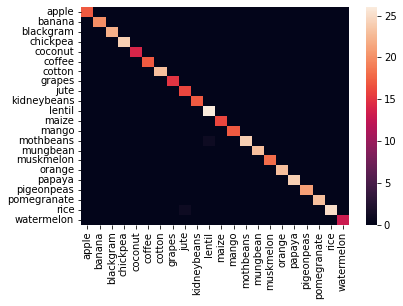

In [94]:

sns.heatmap(confusion_matrix(true_anwer, predicted_answers), xticklabels = crops, yticklabels = crops,)


In [95]:

print(classification_report(true_anwer, predicted_answers))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        15
           8       0.94      1.00      0.97        16
           9       1.00      1.00      1.00        17
          10       0.96      1.00      0.98        26
          11       1.00      1.00      1.00        16
          12       1.00      1.00      1.00        17
          13       1.00      0.96      0.98        25
          14       1.00      1.00      1.00        23
          15       1.00      1.00      1.00        18
          16       1.00      1.00      1.00        23
          17       1.00    

In [96]:
tuning_logs = model1.make_inspector().tuning_logs()
tuning_logs.head()


,score,evaluation_time,best,min_examples,categorical_algorithm,growing_strategy,max_depth,use_hessian_gain,shrinkage,num_candidate_attributes_ratio,split_axis,sparse_oblique_normalization,sparse_oblique_weights,sparse_oblique_num_projections_exponent,max_num_nodes
0,-0.065516,1.604654,False,7,RANDOM,LOCAL,6.0,false,0.15,1.0,AXIS_ALIGNED,NaN,NaN,NaN,NaN
1,-0.057529,1.808071,False,5,CART,LOCAL,6.0,false,0.15,0.9,AXIS_ALIGNED,NaN,NaN,NaN,NaN
2,-0.051385,3.887440,False,5,CART,LOCAL,4.0,false,0.15,1.0,SPARSE_OBLIQUE,MIN_MAX,BINARY,1.5,NaN
3,-0.048213,3.925060,False,5,RANDOM,LOCAL,4.0,true,0.10,0.5,SPARSE_OBLIQUE,STANDARD_DEVIATION,CONTINUOUS,1.5,NaN
4,-0.031570,4.506441,False,5,RANDOM,LOCAL,6.0,true,0.10,0.9,SPARSE_OBLIQUE,NONE,BINARY,1.0,NaN


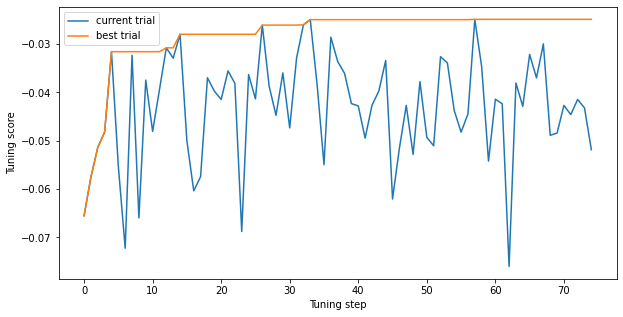

In [97]:
plt.figure(figsize=(10, 5))
plt.plot(tuning_logs["score"], label="current trial")
plt.plot(tuning_logs["score"].cummax(), label="best trial")
plt.xlabel("Tuning step")
plt.ylabel("Tuning score")
plt.legend()
plt.show()

In [98]:
tuner = tfdf.tuner.RandomSearch(num_trials=50, use_predefined_hps=True)

# Define and train the model.
tuned_model = tfdf.keras.GradientBoostedTreesModel(tuner=tuner)
tuned_model.fit(train_ds)

Use /tmp/tmpylbzmdg0 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.149571. Found 1760 examples.
Training model...


[WARNING 23-04-11 10:40:31.8483 IST gradient_boosted_trees.cc:1797] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 23-04-11 10:40:31.8483 IST gradient_boosted_trees.cc:1808] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 23-04-11 10:40:31.8483 IST gradient_boosted_trees.cc:1822] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Model trained in 0:03:22.830508
Compiling model...


[INFO 23-04-11 10:43:54.7806 IST kernel.cc:1242] Loading model from path /tmp/tmpylbzmdg0/model/ with prefix 04ceb1a5c8484e52
[INFO 23-04-11 10:43:54.8303 IST decision_forest.cc:660] Model loaded with 814 root(s), 38628 node(s), and 7 input feature(s).
[INFO 23-04-11 10:43:54.8303 IST abstract_model.cc:1311] Engine "GradientBoostedTreesGeneric" built
[INFO 23-04-11 10:43:54.8303 IST kernel.cc:1074] Use fast generic engine
2023-04-11 10:43:54.853482: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_5' with dtype double and shape [1760]
	 [[{{node Placeholder/_5}}]]


Model compiled.


In [99]:
tuned_model.compile(["accuracy"])
tuned_test_accuracy = tuned_model.evaluate(test_ds, return_dict=True, verbose=0)["accuracy"]

In [100]:
tuned_model.evaluate(test_ds)

1/1 [==============================] - 0s 108ms/step - loss: 0.0000e+00 - accuracy: 0.9932


[0.0, 0.9931818246841431]

In [101]:
tuning_logs = tuned_model.make_inspector().tuning_logs()
tuning_logs.head()

,score,evaluation_time,best,split_axis,sparse_oblique_projection_density_factor,sparse_oblique_normalization,sparse_oblique_weights,categorical_algorithm,growing_strategy,max_num_nodes,sampling_method,subsample,shrinkage,min_examples,use_hessian_gain,num_candidate_attributes_ratio,max_depth
0,-0.068042,9.286486,False,SPARSE_OBLIQUE,1.0,MIN_MAX,BINARY,CART,BEST_FIRST_GLOBAL,16.0,RANDOM,0.6,0.10,10,true,0.2,NaN
1,-0.076268,11.505253,False,SPARSE_OBLIQUE,3.0,STANDARD_DEVIATION,CONTINUOUS,CART,LOCAL,NaN,RANDOM,0.8,0.10,7,false,0.9,4.0
2,-0.036641,22.555505,True,SPARSE_OBLIQUE,4.0,STANDARD_DEVIATION,CONTINUOUS,RANDOM,BEST_FIRST_GLOBAL,256.0,RANDOM,1.0,0.10,20,true,0.5,NaN
3,-0.046776,23.954009,False,SPARSE_OBLIQUE,1.0,NONE,BINARY,CART,BEST_FIRST_GLOBAL,64.0,RANDOM,1.0,0.10,20,false,0.2,NaN
4,-0.038273,25.311006,False,SPARSE_OBLIQUE,2.0,NONE,BINARY,RANDOM,LOCAL,NaN,RANDOM,0.6,0.05,20,false,1.0,4.0


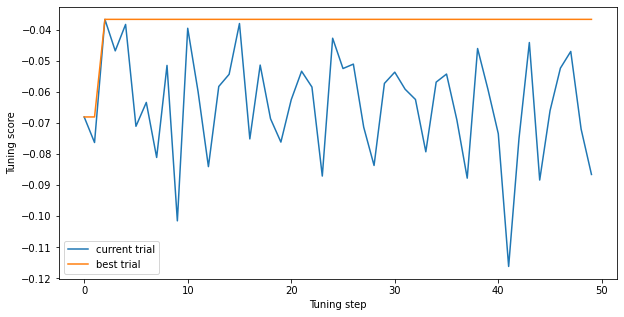

In [102]:
plt.figure(figsize=(10, 5))
plt.plot(tuning_logs["score"], label="current trial")
plt.plot(tuning_logs["score"].cummax(), label="best trial")
plt.xlabel("Tuning step")
plt.ylabel("Tuning score")
plt.legend()
plt.show()

In [103]:
predictions = tuned_model.predict(test_ds)
true_anwer = concat([y for x,y in test_ds], axis=0)
predicted_answers = argmax(predictions, axis=1)

1/1 [==============================] - 0s 66ms/step


<Axes: >

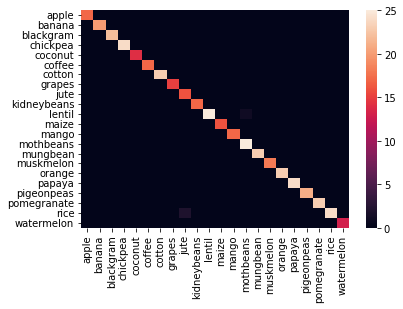

In [104]:
sns.heatmap(confusion_matrix(true_anwer, predicted_answers), xticklabels = crops, yticklabels = crops,)


In [105]:
print(classification_report(true_anwer, predicted_answers))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        15
           8       0.89      1.00      0.94        16
           9       1.00      1.00      1.00        17
          10       1.00      0.96      0.98        26
          11       1.00      1.00      1.00        16
          12       1.00      1.00      1.00        17
          13       0.96      1.00      0.98        25
          14       1.00      1.00      1.00        23
          15       1.00      1.00      1.00        18
          16       1.00      1.00      1.00        23
          17       1.00    